In [1]:
import os
import acoular
from pylab import figure, plot, axis, imshow, colorbar, show, savefig, clf
import matplotlib.pyplot as plt
import h5py
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import butter, sosfilt, welch, lfilter
import soundfile as sf
import cv2
import librosa

In [2]:
# def butter_bandpass(lowcut, highcut, fs, order=5):
#     nyquist = 0.5 * fs
#     low = lowcut / nyquist
#     high = highcut / nyquist
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

# def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

In [9]:
# duration = 5  # Duration of the audio in seconds
# sample_rate = 44100  # Sample rate (samples per second)
# lower_freq = 2950  # Lower limit frequency in Hz
# upper_freq = 3050  # Upper limit frequency in Hz

# # Generate time array
# t = np.linspace(0, duration, duration * sample_rate, endpoint=False)

# # Generate white noise signal
# white_noise = np.random.randn(len(t))

# # # Design a bandpass filter
# # order = 4  # Filter order
# # nyquist = 0.5 * sample_rate  # Nyquist frequency
# low = lower_freq 
# high = upper_freq 
# # sos = butter(order, [low, high], btype='band',output="sos")

# # # Apply the bandpass filter to the white noise
# # filtered_noise = sosfilt(sos, white_noise)

# # # Normalize the audio signal
# # filtered_noise /= np.max(np.abs(filtered_noise))
# filtered_data = butter_bandpass_filter(white_noise, low, high, sample_rate, order=6)
# # Save the audio signal to a WAV file
# # wav.write("white_noise.wav", sample_rate, filtered_noise.astype(np.float32))
# output_dir = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output'
# os.makedirs(output_dir, exist_ok=True)
# output_dir = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records'
# os.makedirs(output_dir,exist_ok=True)
# output_file="c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav"
# wav.write(output_file, sample_rate, filtered_data)

c:\Users\Hriday Desai\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:1893: RuntimeWarning: overflow encountered in multiply
  result = np.conjugate(result) * result
c:\Users\Hriday Desai\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:1893: RuntimeWarning: invalid value encountered in multiply
  result = np.conjugate(result) * result
c:\Users\Hriday Desai\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:1895: RuntimeWarning: invalid value encountered in multiply
  result *= scale
c:\Users\Hriday Desai\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:1901: RuntimeWarning: invalid value encountered in multiply
  result[..., 1:-1] *= 2


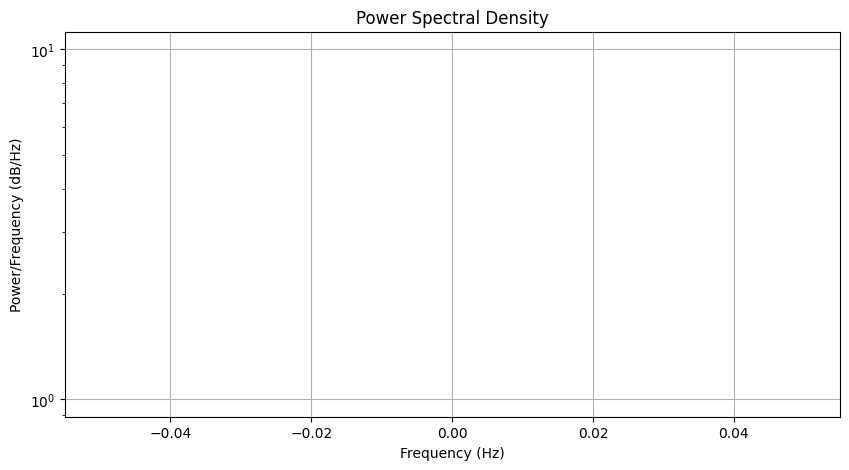

In [10]:
# # Load the audio file
# sample_rate, audio_data = wav.read('c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav')

# # Compute the power spectral density (PSD) using Welch's method
# frequencies, psd = welch(audio_data, fs=sample_rate, nperseg=1024)

# # Plot the power spectrum
# plt.figure(figsize=(10, 5))
# plt.semilogy(frequencies, psd)
# plt.title('Power Spectral Density')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Power/Frequency (dB/Hz)')
# plt.grid(True)
# plt.show()

In [ ]:
input_wav_file='c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav'

In [ ]:
output_dir = 'c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/frames'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# number of frames to be processed per second
framesProcess = 44100//5  

# Open the WAV file and read the audio data
sample_rate, audio_data = wav.read(input_wav_file)
sample_freq = sample_rate

# Calculate the total number of frames based on the frame duration
# num_frames = int(len(audio_data) // (sample_rate * frame_duration))
num_frames = int(len(audio_data)//framesProcess)

# os.makedirs("c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/split_audio", exist_ok=True)
audio_cuts="c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/audio_cuts"
os.makedirs(audio_cuts,exist_ok=True)


# Iterate through each frame and save it as a separate HDF5 file
for i in range(num_frames):
    # Extract the audio data for the current frame
    frame_start = int(i * framesProcess)
    frame_end = int((i + 1) * framesProcess)
    frame_audio_data = audio_data[frame_start:frame_end]

    output_audio_cut_file=f"c:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/audio_cuts/audio_cut_{i+1}.wav"
    wav.write(output_audio_cut_file, sample_rate, frame_audio_data)
    
    # Create the output HDF5 file path for the current frame
    output_h5_file = f"{output_dir}/frame_{i + 1}.h5"

    # Create an HDF5 file for the current frame
    with h5py.File(output_h5_file, 'w') as hf:
        # Create a dataset to store audio data
        hf.create_dataset('/time_data', data=frame_audio_data, dtype=np.int16)

        # Add attribute for sample rate
        hf['/time_data'].attrs['sample_freq'] = sample_rate

In [ ]:
micgeofile = 'C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/xml/microphone.xml'

mg = acoular.MicGeom( from_file=micgeofile )

# Check the number of microphones
num_mics = mg.num_mics
print("Number of microphones:", num_mics)
# Define the rectilinear grid
rg = acoular.RectGrid(x_min=-1.5, x_max=1.5, y_min=-1, y_max=1, z=3, increment=0.02)
# Define the steering vector
st = acoular.SteeringVector(grid=rg, mics=mg)
# Compute the beamformer base

In [ ]:
os.makedirs("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/frame_images", exist_ok=True)
audio_files_count=0
for i in range(num_frames):
    output_h5_file = f"{output_dir}/frame_{i + 1}.h5"
    datafile = output_h5_file
    
    audio_cut_file=f"{audio_cuts}/audio_cut_{i+1}.wav"
    y, sr = librosa.load(audio_cut_file, sr=None)

    # Compute the FFT (Fast Fourier Transform) to obtain the power spectrum
    fft_result = np.fft.fft(y)

    # Compute the frequencies corresponding to the FFT bins
    fft_freqs = np.fft.fftfreq(len(y), 1/sr)

    # Discard negative frequencies
    positive_fft_freqs = fft_freqs[:len(fft_freqs)//2]
    positive_fft_result = fft_result[:len(fft_result)//2]

    # Find the frequency with the maximum power
    max_power_index = np.argmax(np.abs(positive_fft_result))
    max_power_frequency = positive_fft_freqs[max_power_index]

    # print("Max Power Frequency:", max_power_frequency, "Hz")
    
    ts = acoular.TimeSamples(name=datafile)
    ps = acoular.PowerSpectra(time_data=ts, block_size=1024, window='Hanning')
    bb = acoular.BeamformerBase(freq_data=ps, steer=st)
    # Compute the synthetic sound field
    pm = bb.synthetic(max_power_frequency, 3)
    # Compute the sound pressure level
    Lm = acoular.L_p(pm)
    
    imshow( Lm.T, origin='lower', vmin=Lm.max()-0.5, extent=rg.extend() ,interpolation="bicubic", cmap="rainbow")

    axis('off')
    
    output_file = f"C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/frame_images/frame_{i+1}.png"
    audio_files_count+=1
    # Save the plot as an image file
    savefig(output_file, bbox_inches='tight', pad_inches=0)
    clf()
    # Clear the current plot to prepare for the next frame
    # clf()  # Clear the current figure

In [ ]:
# Function to extract frames from video
video_path="C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/video.avi"
output_folder="C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/imageshots"
frame_rate_ms=400

def extract_frames(video_path, output_folder, frame_rate_ms):
    # Create output folder if not exists
    os.makedirs(output_folder, exist_ok=True)

    # Open video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    # Get frame rate of the video
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    
    # Calculate frame interval based on desired frame rate (in milliseconds)
    # frame_interval = int(frame_rate * frame_rate_ms)
    
    frame_interval = frame_rate_ms
    
    # Variables to track frame number and current time
    frame_count = 0
    current_time = 0

    # Loop through video frames
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Check if it's time to save the frame
        if current_time >= frame_interval:
            # Save frame as image
            image_path = os.path.join(output_folder, f"frame_{1+frame_count}.png")
            cv2.imwrite(image_path, frame)
            frame_count += 1
            current_time = 0

        # Update current time
        current_time += int(1000 / frame_rate)

        # Move to next frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, cap.get(cv2.CAP_PROP_POS_FRAMES) + 1)

    cap.release()

    print(f"Frames extracted: {frame_count}")
    print("Extraction complete.")
    return frame_count
frame_count=extract_frames(video_path, output_folder, frame_rate_ms)

In [ ]:
merge_frame_count=min(frame_count,audio_files_count)
audio_images_directory="C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/frame_images"
video_images_directory="C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/imageshots"

output_folder="C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/merged_images"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
def merge_images(background_img, overlay_img, output_path):
    # Read the images
    background = cv2.imread(str(background_img))
    overlay = cv2.imread(str(overlay_img))

    # Resize overlay image to match background dimensions
    overlay = cv2.resize(overlay, (background.shape[1], background.shape[0]))
    # Horizontally flip the overlay image
    # overlay_flipped = cv2.flip(overlay, 1)
    overlay_flipped = overlay
    # Blend the images using simple addition
    blended = cv2.addWeighted(background, 0.3, overlay_flipped, 0.7, 0)

    # Write the blended image to the output path
    cv2.imwrite(str(output_path), blended)

    print(f"Merged image saved: {output_path}")

In [ ]:
# Specify the directories containing the images
imageshots_dir = video_images_directory
frame_images_dir = audio_images_directory

imageshots_files=[]
frame_images_files=[]
merged_images_files=[]
for i in range(1,merge_frame_count+1):
    imageshots_files.append(f"C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/imageshots/frame_{i}.png")
    frame_images_files.append(f"C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/frame_images/frame_{i}.png")
    merged_images_files.append(f"C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/merged_images/frame_{i}.png")

output_dir=output_folder
# Iterate through the PNG files and merge them
# for imageshot_file in imageshots_files:
for j in range(1,merge_frame_count+1):
    frame_image_path = frame_images_files[j-1]
    imageshot_path = imageshots_files[j-1]
    merged_image_path = merged_images_files[j-1]
    
    merge_images(imageshot_path,frame_image_path,merged_image_path)

print("Merge process complete.")

In [ ]:
from moviepy.editor import ImageSequenceClip
from pathlib import Path
# Specify the directory containing the merged images
merged_images_dir = Path("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/merged_images")

# Get a list of image files in the directory
image_files = sorted([str(f) for f in merged_images_dir.iterdir() if f.suffix == '.png'])

# Specify the frame rate (5 images per second)
fps = 5

# Create an ImageSequenceClip from the image files
clip = ImageSequenceClip(image_files, fps=fps)

# Specify the output video file path
output_video_path = "C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/output_video.mp4"

# Write the clip to the output video file
clip.write_videofile(output_video_path, codec='libx264')

print(f"Video saved: {output_video_path}")

In [ ]:
import numpy as np
import librosa

# Load the audio file
audio_file = "C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav"
y, sr = librosa.load(audio_file, sr=None)


# Compute the FFT (Fast Fourier Transform) to obtain the power spectrum
fft_result = np.fft.fft(y)

# Compute the frequencies corresponding to the FFT bins
fft_freqs = np.fft.fftfreq(len(y), 1/sr)

# Discard negative frequencies
positive_fft_freqs = fft_freqs[:len(fft_freqs)//2]
positive_fft_result = fft_result[:len(fft_result)//2]

# Find the frequency with the maximum power
max_power_index = np.argmax(np.abs(positive_fft_result))
max_power_frequency = positive_fft_freqs[max_power_index]

print("Max Power Frequency:", max_power_frequency, "Hz")

In [ ]:
from scipy.io import wavfile

# Load the audio file
sample_rate, audio_data = wavfile.read("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/audio.wav")

# Transpose the audio data matrix
audio_data_transposed = np.transpose(audio_data)

# Extract the desired channel (assuming you want the first channel)
desired_channel = 0
desired_audio_channel = audio_data_transposed[desired_channel]
wavfile.write("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/desired_audio_channel.wav", sample_rate, desired_audio_channel)

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip

# Load the video file
video_clip = VideoFileClip("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/output_video.mp4")

# Load the audio file
audio_clip = AudioFileClip("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/desired_audio_channel.wav")

# # Extract the desired channel from the audio file (assuming you want the first channel)
# desired_channel = 0
# desired_audio = audio_clip.to_soundarray()[:, desired_channel]

# # Synchronize audio and video durations if necessary
# if video_clip.duration != audio_clip.duration:
#     # Adjust audio duration to match video duration
#     desired_audio = desired_audio[:int(video_clip.duration * audio_clip.fps)]

# Replace the audio in the video file with the desired audio channel
video_clip = video_clip.set_audio(audio_clip)

# Write the modified video file with replaced audio
video_clip.write_videofile("C:/Users/Hriday Desai/OneDrive/Desktop/Acoustic/recorder/recorder_output/records/output_video_with_audio.mp4", codec="libx264", audio_codec="aac")

print("Video with replaced audio saved successfully.")
